# 데이터 전처리 실습

- 타이타닉 생존자 예측 문제 데이터의 전처리

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.36.15.png?raw=1" width=400 align='left'>

# 데이터
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

## import

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [124]:
data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")
print(data.shape)
data[:3]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [125]:
# 사본 사용
df = data.copy()


## 데이터 전처리 종류

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

## 데이터 기본 정보
- info를 사용
- 컬럼 이름, 컬럼수(특성 수), 샘플수를 파악한다
- 카테고리형 타입(object)과 숫자형 타입(int, float)을 파악한다
 - 숫자 타입도 연속적인 값을 갖는 아나로그형과 카테고리형이 있다

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
# 숫자형 데이터의 기본 통계값 보기
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
# 카테고리형 데이터의 기본 통계값 보기
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Petranec, Miss. Matilda",male,CA. 2343,G6,S
freq,1,577,7,4,644


<AxesSubplot:>

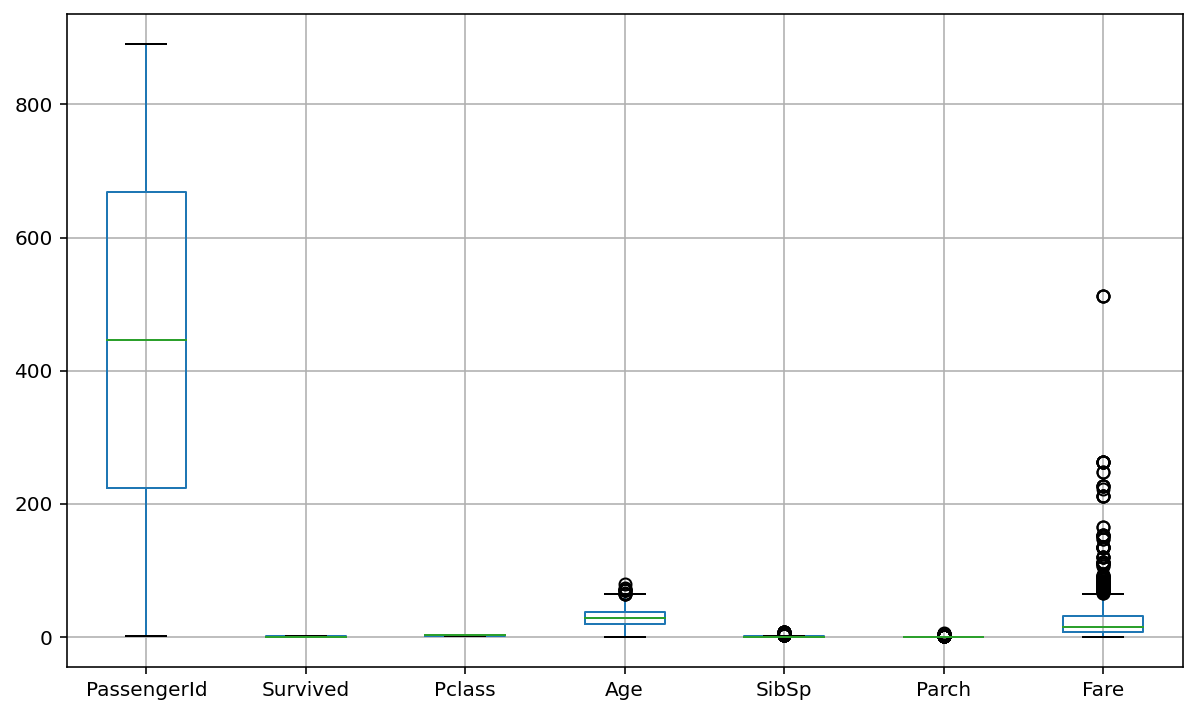

In [129]:
# 박스 플롯으로 데이터의 전체적인 값의 범위를 파악할 수 있다
plt.figure(figsize=(10,6))
df.boxplot()

In [130]:
# 컬럼명 보기
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

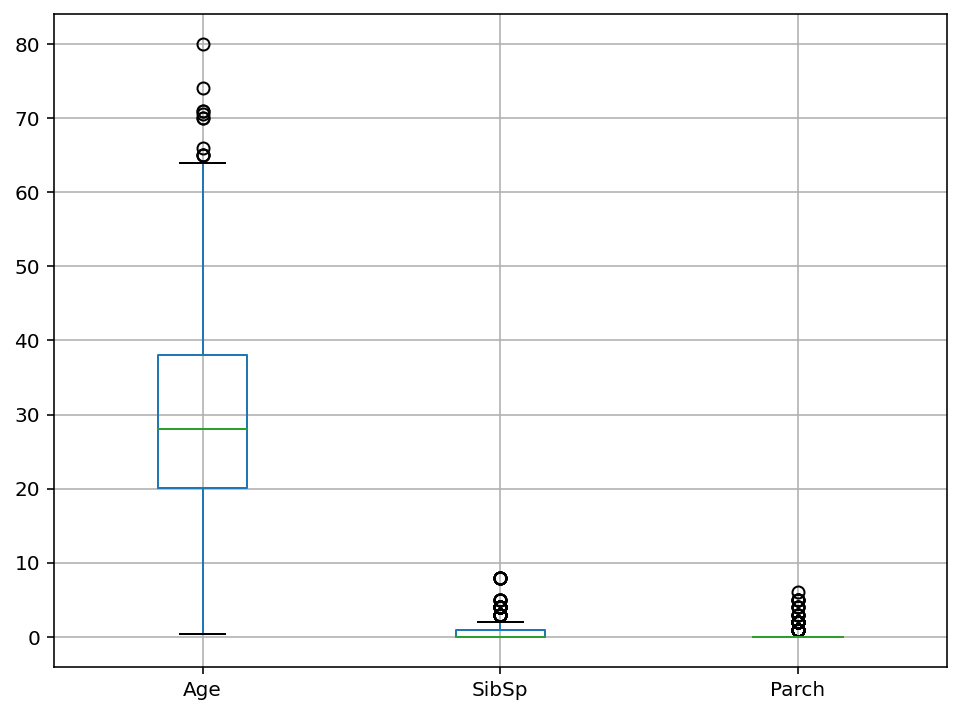

In [131]:
# 특정 컬럼만 보기
plt.figure(figsize=(8,6))
df[['Age', 'SibSp','Parch']].boxplot()

<AxesSubplot:>

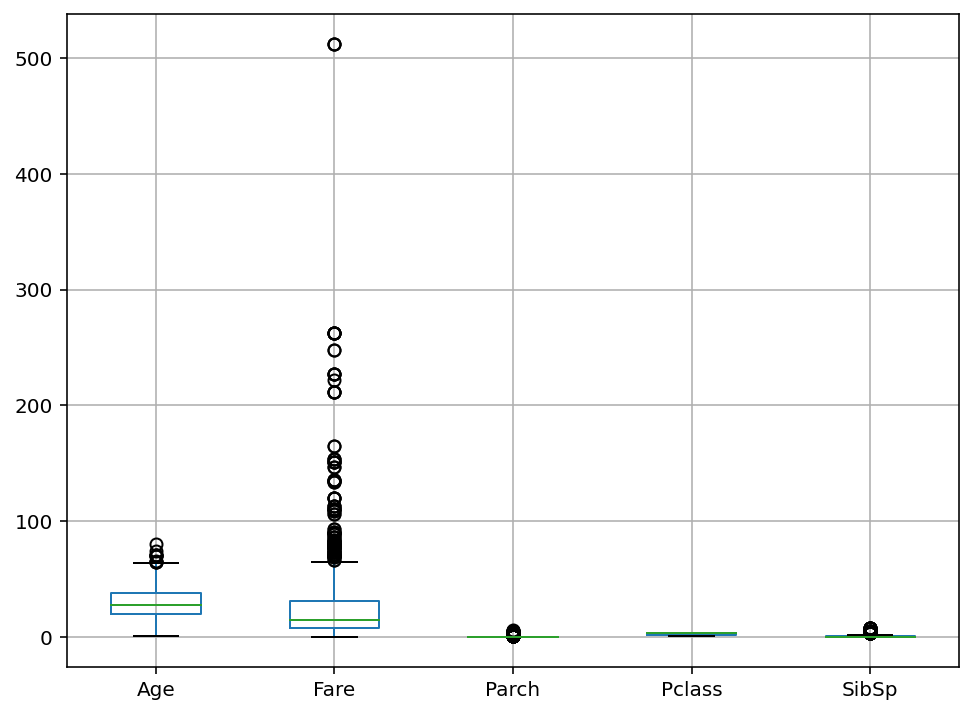

In [132]:
# 특정 컬럼만 제외하고 보기
plt.figure(figsize=(8,6))
df[df.columns.difference(['PassengerId', 'Survived'])].boxplot()

# 결측치 처리

- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
- 특정 컬럼에 결측치가 너무 많은 경우 컬럼 자체를 사용하지 않는 방법도 있다


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-06%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.01.24.png?raw=1" width=320 align='left'>

In [133]:
# 컬럼별 결측치 갯수
# 결측치가 있는 컬럼이 3개인 것을 알 수 있다
# df.isnull().sum().to_frame()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 결측치 샘플 삭제
- 항구 데이터(Embarked)는 결측치가 2개 뿐이고 다른 값으로 대체하기가 어려우므로 샘플을 삭제한다

In [134]:
df.shape

(891, 12)

In [135]:
~df["Embarked"].isnull()

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Embarked, Length: 891, dtype: bool

In [136]:
df = df[~df["Embarked"].isnull()]
# df = df.dropna()
df.shape

(889, 12)

## 컬럼 미사용
- Cabin은 객실명으로, 의미있는 정보가 아니고, 결측치가 많고(687개), 종류가 다양하므로(146종류) 컬럼 자체를 사용하지 않기로 한다

In [137]:
df.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
E101           3
              ..
D19            1
C99            1
D15            1
A34            1
E38            1
Name: Cabin, Length: 146, dtype: int64

In [138]:
# 객실명 보기
print("Cabin 결측치수:", df.Cabin.isnull().sum())
print("Cabin 종류:", len(df.Cabin.value_counts()))
df.Cabin.value_counts()[:10]

Cabin 결측치수: 687
Cabin 종류: 146


C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
E101           3
D              3
F2             3
F33            3
C83            2
C93            2
Name: Cabin, dtype: int64

## 결측치 대체

- Age(나이)는 결측치가 많으나, 의미 있는 정보이므로 삭제하지 않고 다른 값으로 대체한다 (평균치 사용)

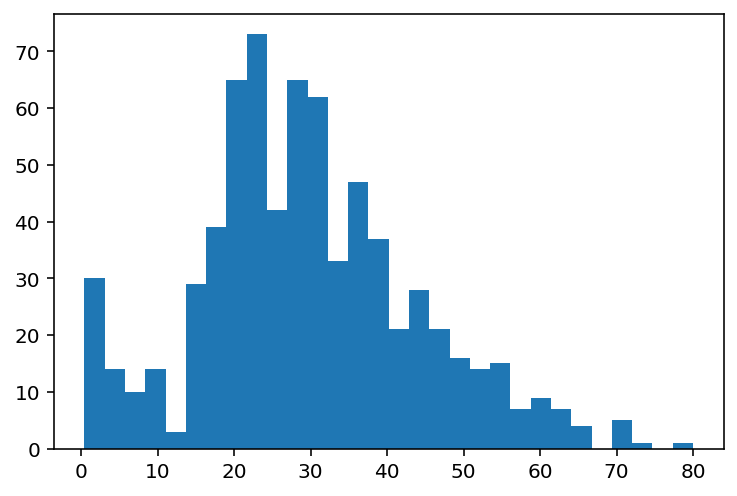

In [139]:
# 나이 데이터 분포
plt.hist(df.Age, bins=30); plt.show()

In [140]:
# 나이 평균
df.Age.mean()

29.64209269662921

In [141]:
# 결측치를 평균 나이로 대체 (대체한 것을 즉시 반영함)
df.Age.fillna(df.Age.mean(), inplace=True)
df.Age.isnull().sum()

0

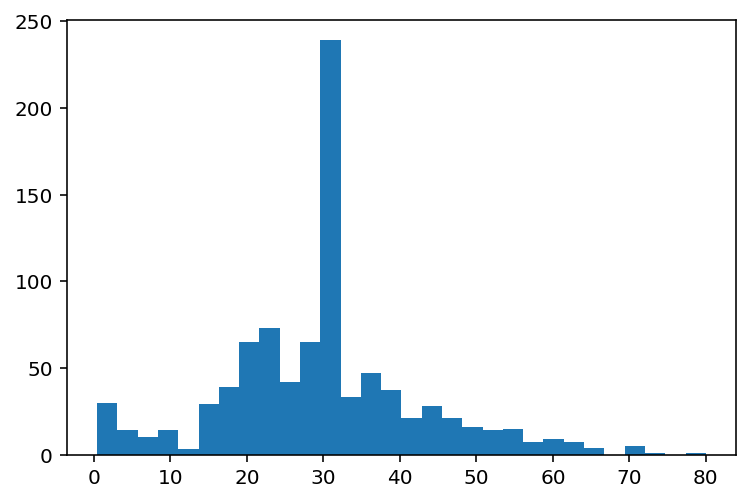

In [142]:
# 결측치를 평균값으로 대체한 후 나이 분포
plt.hist(df.Age, bins=30); plt.show()

# 데이터 변환
- 카테고리 변수와 아나로그 변수로 나누어 처리한다
- 카테고리 변수는 일반적으로 원핫 인코딩으로 표현한다
- 아나로그 변수는 로그변환, 역수변환 등을 하거나 카테고리 변수로 변환하기도 한다

## 카테고리 변수
### 선실 등급
- 숫자로 표현되어 있으나 카테고리를 나타낸다 (3가지 등급)
- 원핫(one-hot) 인코딩으로 변환한다
- get_dummies() 사용

In [143]:
# 선실 등급은 3가지 등급을 나타내는 카테고리 변수임
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [144]:
df = pd.get_dummies(df, columns=["Pclass"])
df[:3]

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1


### 성별
- 성별도 카테고리 변수이며 원핫 인코딩으로 변환한다

In [145]:
# 성별의 구성
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

### 항구명
- 세가지 항구명도 카테고리 변수이며 원핫 인코딩으로 변환한다

In [146]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [147]:
# 성별과 항구명을 원핫 인코딩한다
df = pd.get_dummies(df, columns=["Sex","Embarked"])
df[:3]

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1


### 티켓명
- 680 종류나 되며 분석에 큰 의미가 없는 것으로 보인다. 분석에 사용하지 않는다

In [148]:
df['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
347468      1
2669        1
2687        1
248706      1
7540        1
Name: Ticket, Length: 680, dtype: int64

In [149]:
# 티켓의 종류 수
df['Ticket'].nunique()

680

In [150]:
# 티켓명 보기
df['Ticket'].unique()[:20]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649'], dtype=object)

## 아나로그 변수

### 요금

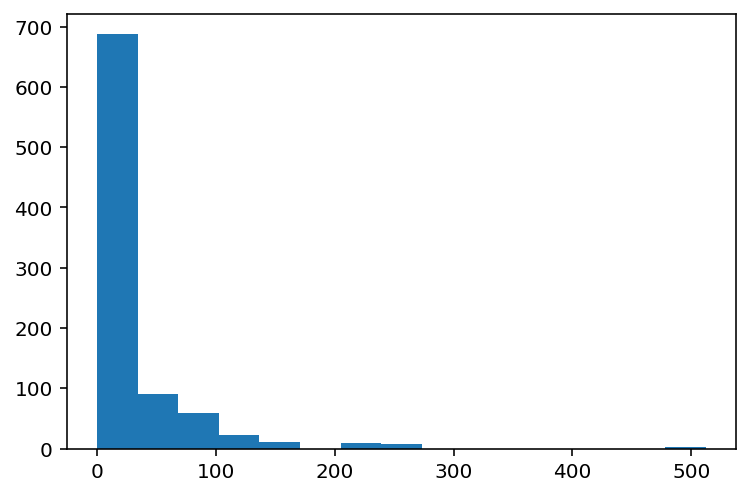

In [151]:
plt.hist(df.Fare, bins=15); plt.show()

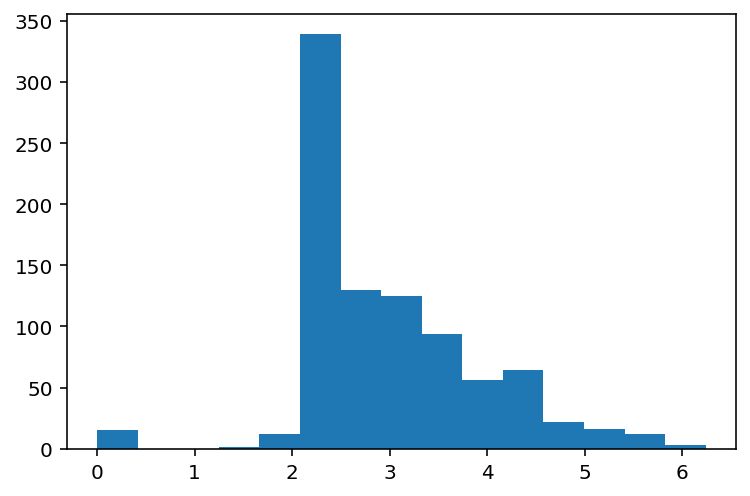

In [152]:
# 돈과 관련된 값은 로그변환을 하여 선형적인 값으로 변환하는 경우가 많다
# 로그를 취하면 정규 분포처럼 보인다 (log-normal 분포)
plt.hist(np.log(df.Fare+1), bins=15); plt.show()

### 기타 변수
- 형제, 동반자, 부모, 자녀 수 등은 다양하게 분포하며 분석에 그대로 사용할 수 있을 것이다
- 즉, 별도의 변환은 하지 않는다

In [153]:
# 형제, 동반자 수 종류
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [154]:
# 부모, 자녀 수 종류
df.Parch.value_counts()

0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

# 컬럼 취합
- 원핫 인코딩으로 만든 컬럼들을 모두 합친다

In [155]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [156]:
# 사용할 아나로그 변수 컬럼들을 먼저 선택한다
features = ['Age', 'SibSp', 'Parch',
       'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features]
X[:3]

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1


In [157]:
# 요금은 로그 변환한 값을 사용한다 (오류 발생을 피하기 위해서 작은 값을 더해준다)
X.Fare = np.log(X.Fare +0.1)
X[:3]

/Users/hjk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,1.994700,0,0,1,0,1,0,0,1
1,38.0,1,0,4.268064,1,0,0,1,0,1,0,0
2,26.0,0,0,2.082562,0,0,1,1,0,0,0,1


# 스케일링
- 일반적으로 연속형, 아나로그 값은 스케일링을 하는 것이 안전하다
- 결정트리, 랜덤 포레스트 등 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만 선형모델, 신경망 모델 등에서 스케일링을 해야 잘 동작한다
- 기본적으로는 표준 스케일링을 하며, 최대값과 최소값의 범위가 분명히 한정되어 있을 때는 min-max 스케일링도 사용한다

In [158]:
# 표준 스케일링 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['Age', 'SibSp', 'Parch', 'Fare']])

<ipython-input-158-0a836724e19f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['Age', 'SibSp', 'Parch', 'Fare']])
/Users/hjk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [159]:
X[:3]

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.589620,0.431350,-0.474326,-0.755613,0,0,1,0,1,0,0,1
1,0.644848,0.431350,-0.474326,1.232311,1,0,0,1,0,1,0,0
2,-0.281003,-0.475199,-0.474326,-0.678783,0,0,1,1,0,0,0,1


# 선형 분류 예측
- 개인별 정보를 보고 이 사람의 생존 여부를 예측하는 선형 분류 모델을 만들어 보겠다
- 분류에 대해서는 "머신러닝"에서 자세히 설명한다

### 이진 분류를 위한 결정 경계 (decision boundary)
- 하나의 변수만 사용하는 경우 선형분류 결정 경계: $x_{1} > b$  
- 두 개의 변수를 사용하는 경우 선형분류 결정 경계: $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=550 align='left'>


## 모델 훈련 및 성능 측정


### 목적 변수
- 분류 예측 대상 데이터로서 여기서는 생존 여부 데이터인 Survived 컬럼의 값이다

In [160]:
y = df.Survived
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [161]:
# 선형 분류 함수로 SGDClassifier를 사용
from sklearn.linear_model import SGDClassifier
model = SGDClassifier() # 모델 생성

In [162]:
# 전체 데이터를 훈련 데이터와 검증 데이터로 랜덤하게 나눈다 (디폴트 비율은 75%: 25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8, shuffle=True)

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

In [163]:
# 훈련 및 검증 데이터 갯수
len(X_train), len(X_test)

(666, 223)

In [164]:
# 모델을 학습시킨다 (학습 데이터 사용)
model.fit(X_train, y_train)
# 검증 데이터를 사용하여 모델의 성능을 본다 - score 함수는 정확도 (accuracy)를 알려준다
model.score(X_test, y_test)

0.8026905829596412

In [165]:
# 선형 모델의 가중치를 본다
# 각 특성이 얼마나 중요하게 반영되었는지를 나타낸다
model.coef_

array([[-1.11298643, -0.85603476, -1.6580869 ,  0.95218125,  0.82651459,
        -0.27550486, -1.37752431,  1.92853404, -2.75504863, -0.55100973,
         0.55100973, -0.82651459]])

In [166]:
# 가중치의 컬럼 이름을 확인하고 큰 값 순으로 정렬하여 보겠다
result = pd.DataFrame({'feature':X.columns,'weight':model.coef_[0].round(3)})
result.sort_values('weight', ascending=False, inplace=True)
result

,feature,weight
7,Sex_female,1.929
3,Fare,0.952
4,Pclass_1,0.827
10,Embarked_Q,0.551
5,Pclass_2,-0.276
9,Embarked_C,-0.551
11,Embarked_S,-0.827
1,SibSp,-0.856
0,Age,-1.113
6,Pclass_3,-1.378


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

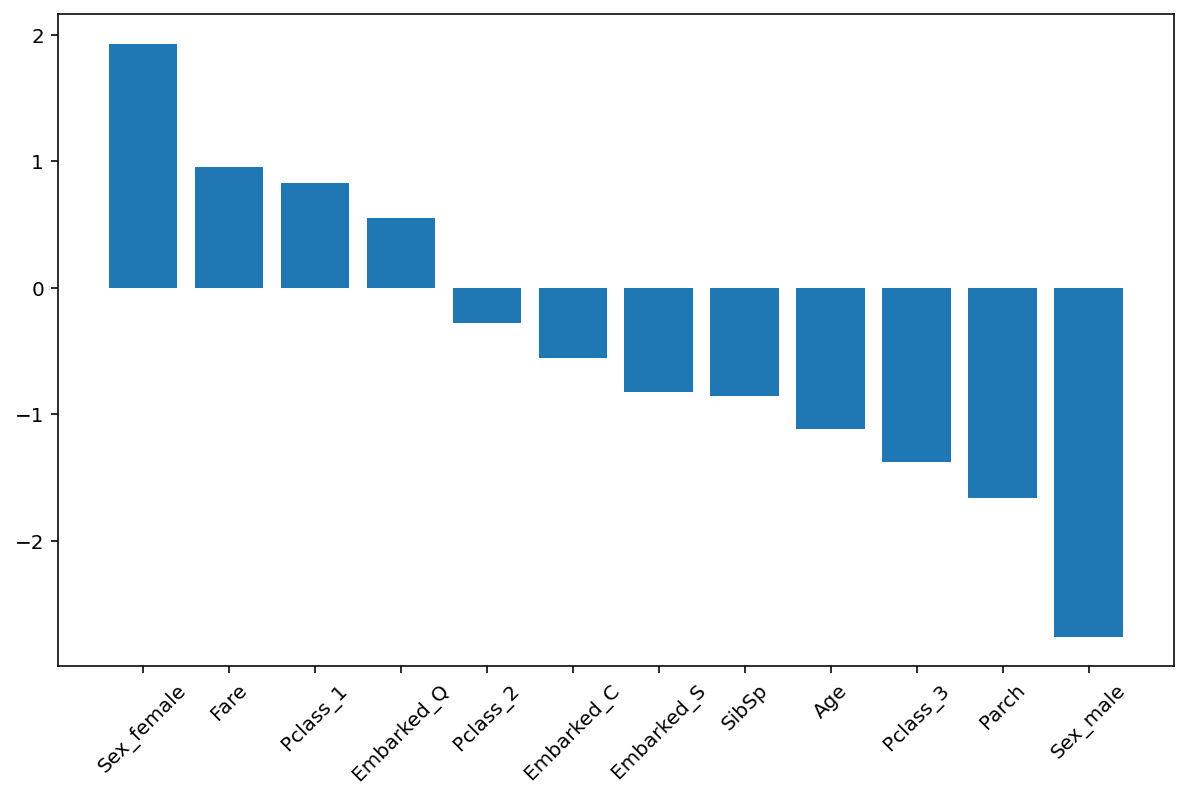

In [167]:
# 가중치 값을 그래프로 보기
plt.figure(figsize=(10,6))
plt.bar(result.feature, result.weight)
plt.xticks(rotation=45)

- 위 결과를 보면 생존하는데 가장 많이 기여한 변수는 여성, 요금, 1등석 등이고
- 생존하지 않는데 가장 많이 기여한 변수는 남성, 나이, 3등객실 등인 것을 알 수 있다

In [168]:
# 과제: X로 12개의 컬럼을 사용했다. --> 임의로 3개만 선택 사용하면 성능이 어떻게 되나?
# 어떤 특성이 중요한지를 알아보는 방법, coef_(선형계열 모델), feature_importances_(트리계열 모델) 내부 변수를 본다
# 목적변수 y와의 corr (상관계수)를 보기도 한다

In [169]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7130044843049327

In [170]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7757847533632287

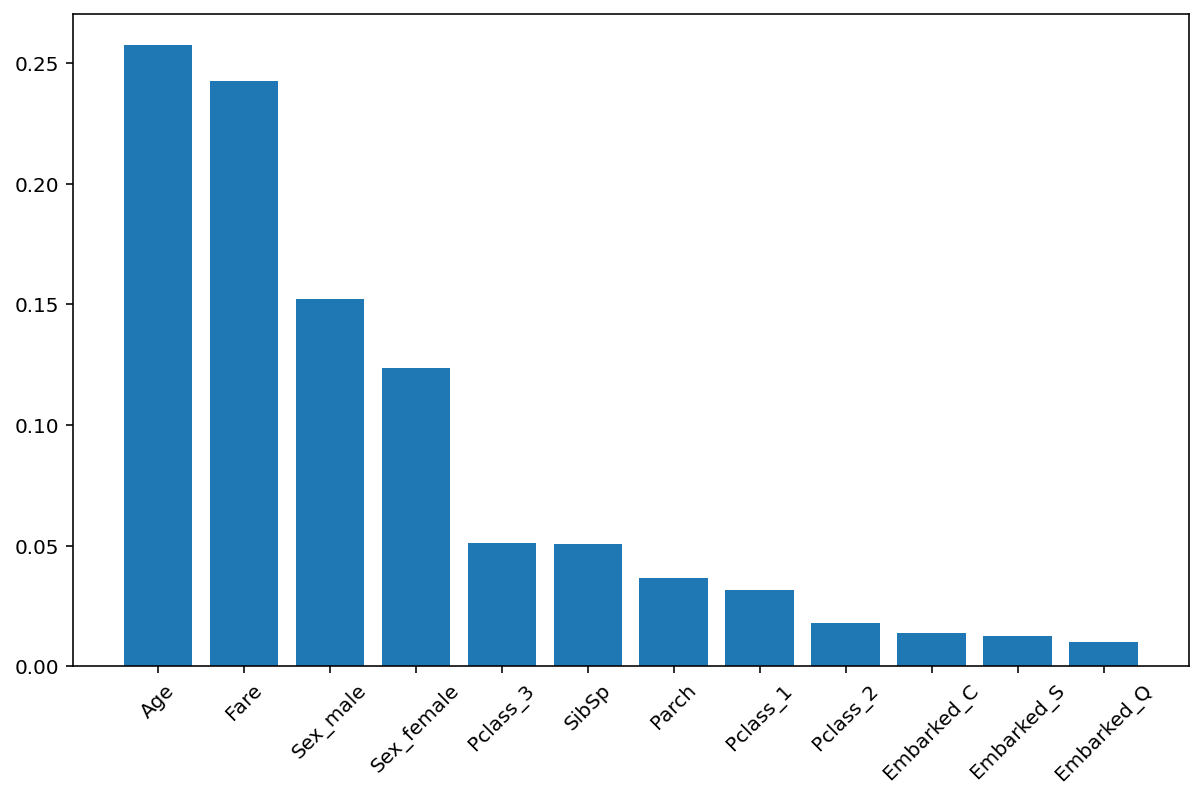

In [171]:
result = pd.DataFrame({'feature':X.columns,'weight':model.feature_importances_})
result.sort_values('weight', ascending=False, inplace=True)
plt.figure(figsize=(10,6))
plt.bar(result.feature, result.weight)
plt.xticks(rotation=45)
plt.show()

In [172]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8295964125560538

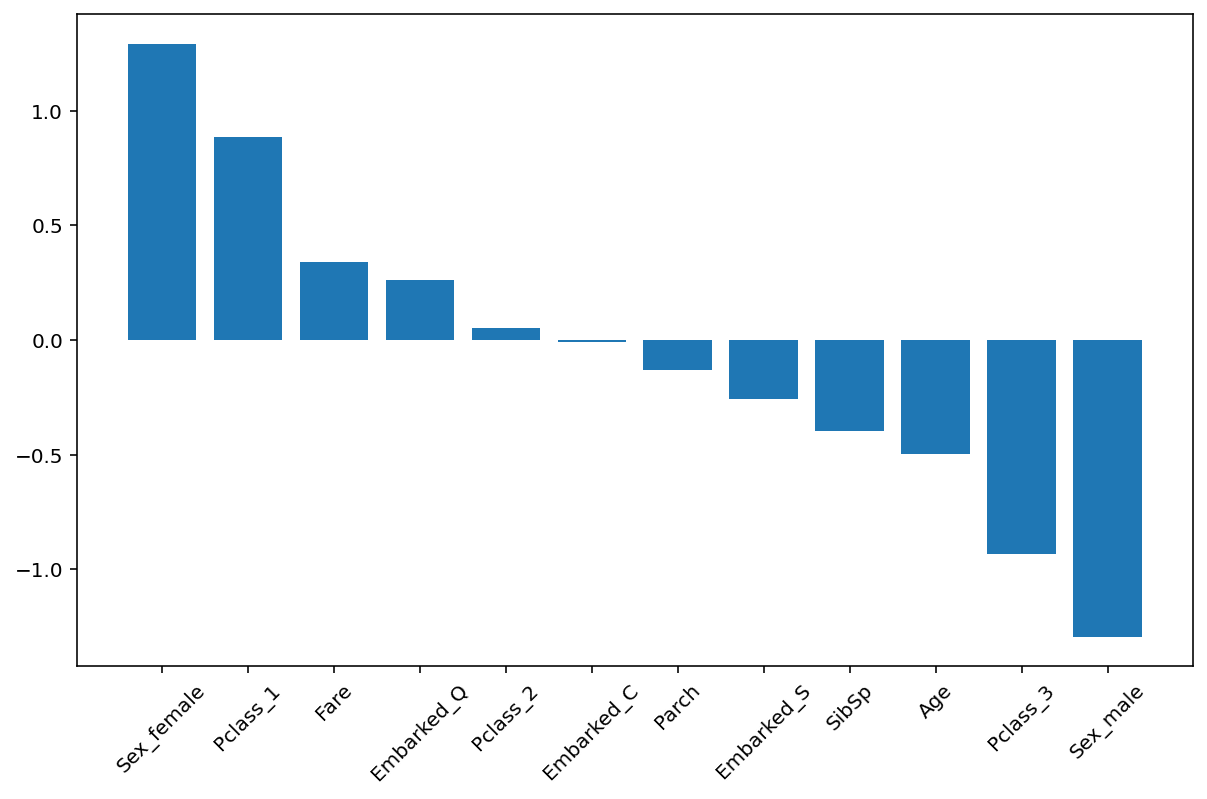

In [174]:
result = pd.DataFrame({'feature':X.columns,'weight':model.coef_.ravel()})
result.sort_values('weight', ascending=False, inplace=True)
plt.figure(figsize=(10,6))
plt.bar(result.feature, result.weight)
plt.xticks(rotation=45)
plt.show()